In [1]:
import numpy as np
from spec_id import Scale_model, Cluster, Cluster_model,Gauss_dist,Divide_cont, Cluster_fit,Likelihood_contours,Cluster_fit_sim_MC
import matplotlib.pyplot as plt
from matplotlib import gridspec
from vtl.Readfile import Readfile
from glob import glob
from astropy.io import fits, ascii
from astropy.table import Table
from scipy.interpolate import interp1d
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [17]:
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,14.1,.1)

rshift=[1.1,1.2,1.35]
mparam=[0.004,0.015,0.019]
aparam=[3.0,6.0,11.0]

for i in range(len(rshift)): 
    for ii in range(len(mparam)):
        for iii in range(len(aparam)):
            Cluster_fit_sim_MC('../clusters/ngc6528_griz_err_%s.npy' % rshift[i], mparam[ii], aparam[iii],0,metal,age,rshift[i],
                       'sim6528_m%s_a%s_z%s' % (mparam[ii], aparam[iii], rshift[i]),repeats=1000)

Done!


Done!


Done!


Done!


Done!


Done!


Done!


Done!


Done!


Done!


Done!


Done!


Done!


Done!


Done!


Done!


Done!


Done!


Done!


Done!


Done!


Done!


Done!


Done!


Done!


Done!


Done!


In [23]:
'''Construct simulated cluster spectra'''
ngc=Cluster('../clusters/ngc6528_griz_err_1.1.npy',1.1)
ngc.Remove_continuum()
sim_gc = Cluster_model(0.015,11.0,0,1.1,ngc.nc_wv*(1 + ngc.redshift), ngc.nc_fl, ngc.nc_er)
sim_gc.Simulate_cluster()
sim_gc.Remove_continuum(use_sim=True)
sim_gc.Remove_continuum()

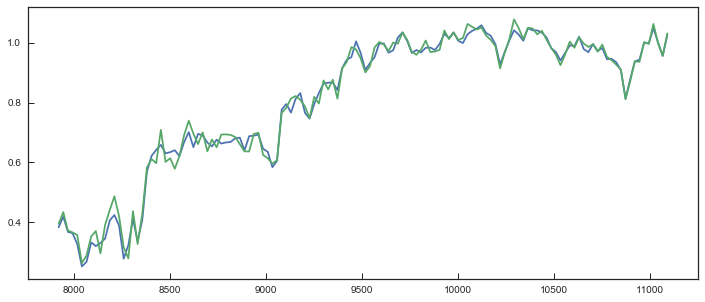

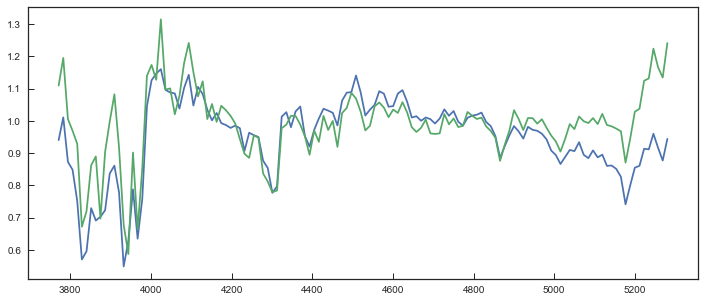

In [25]:
'''check simulated spectra'''
%matplotlib inline

plt.figure(figsize=[12,5])
plt.plot(sim_gc.wv,sim_gc.fl)
plt.plot(sim_gc.simwv,sim_gc.simfl)
plt.show()
plt.close()

plt.figure(figsize=[12,5])
plt.plot(sim_gc.nc_wv,sim_gc.nc_fl)
plt.plot(sim_gc.nc_simwv,sim_gc.nc_simfl)
plt.show()
plt.close()

In [30]:
def Get_cont(wave,flux, z):
    IDx = [U for U in range(len(wave)) if 7500 < wave[U] < 11500]

    wv = wave[IDx]
    fl = flux[IDx]

    w = wv / (1 + z)

    m2r = [3800, 3850, 3910, 4030, 4080, 4125, 4250, 4385, 4515, 4570, 4810, 4910, 4975, 5055, 5110, 5285]

    Mask = np.zeros(len(w))
    for i in range(len(Mask)):
        if m2r[0] <= w[i] <= m2r[1]:
            Mask[i] = 1
        if m2r[2] <= w[i] <= m2r[3]:
            Mask[i] = 1
        if m2r[4] <= w[i] <= m2r[5]:
            Mask[i] = 1
        if m2r[6] <= w[i] <= m2r[7]:
            Mask[i] = 1
        if m2r[8] <= w[i] <= m2r[9]:
            Mask[i] = 1
        if m2r[8] <= w[i] <= m2r[9]:
            Mask[i] = 1
        if m2r[10] < w[i] <= m2r[11]:
            Mask[i] = 1
        if m2r[12] <= w[i] <= m2r[13]:
            Mask[i] = 1
        if m2r[14] <= w[i] <= m2r[15]:
            Mask[i] = 1

    maskw = np.ma.masked_array(w, Mask)

    params = np.ma.polyfit(maskw, fl, 3)
    C0 = np.polyval(params, w)

    return w*(1+z), C0

In [31]:
mwv,Cm = Get_cont(sim_gc.wv,sim_gc.fl,1.1)
swv,Cs = Get_cont(sim_gc.simwv,sim_gc.simfl,1.1)

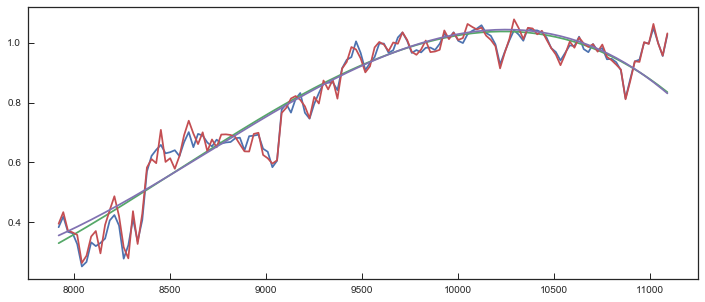

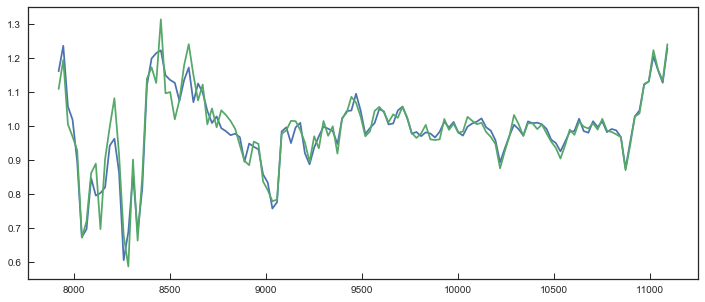

In [35]:
plt.figure(figsize=[12,5])
plt.plot(sim_gc.wv,sim_gc.fl)
plt.plot(mwv,Cm)
plt.plot(sim_gc.simwv,sim_gc.simfl)
plt.plot(swv,Cs)
plt.show()
plt.close()

plt.figure(figsize=[12,5])
plt.plot(sim_gc.wv,sim_gc.fl/Cm)
plt.plot(sim_gc.simwv,sim_gc.simfl/Cs)
plt.show()
plt.close()

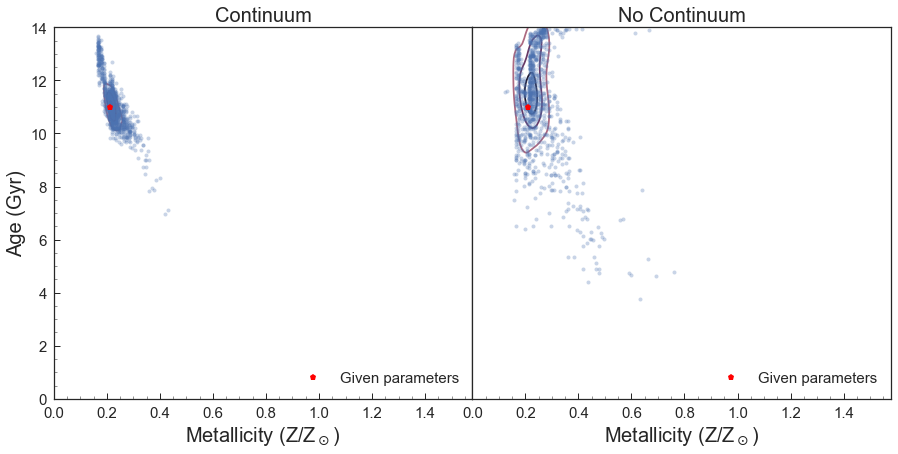

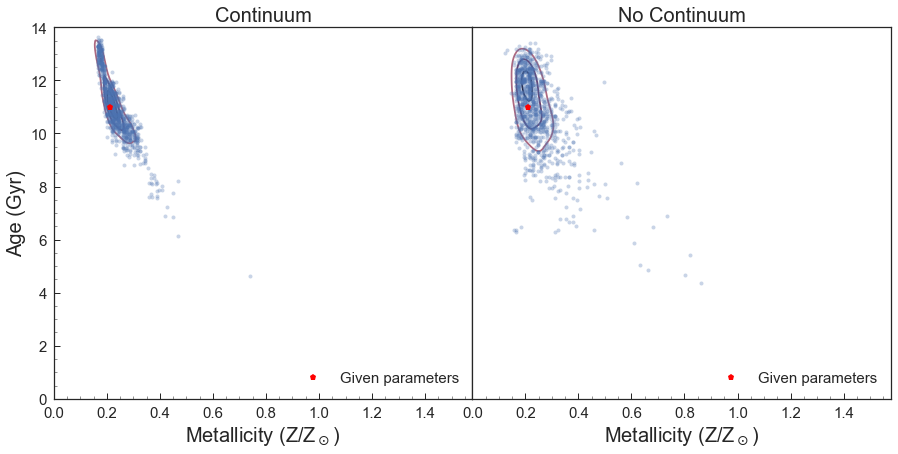

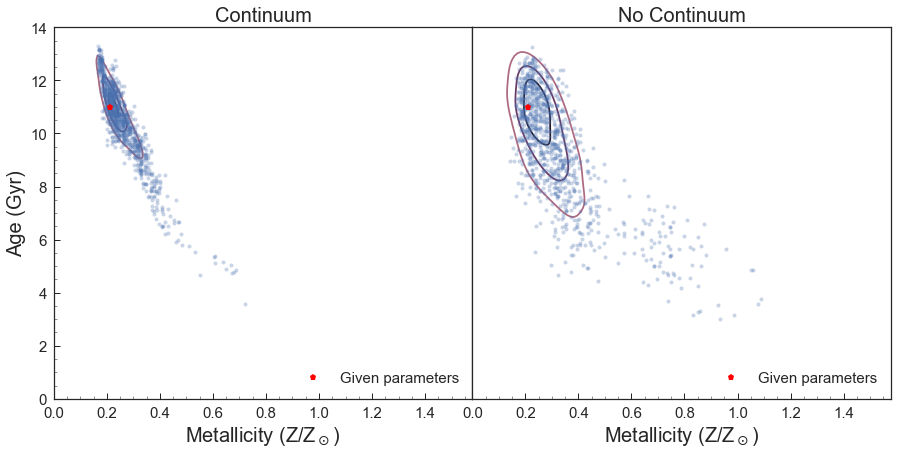

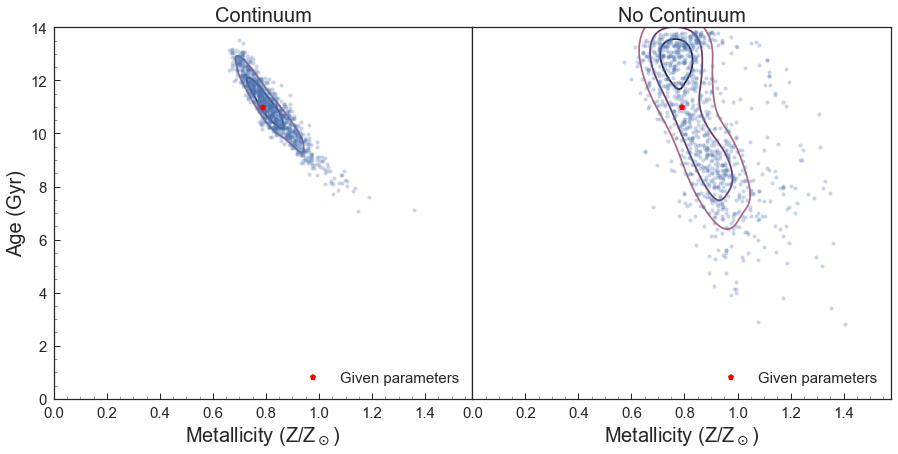

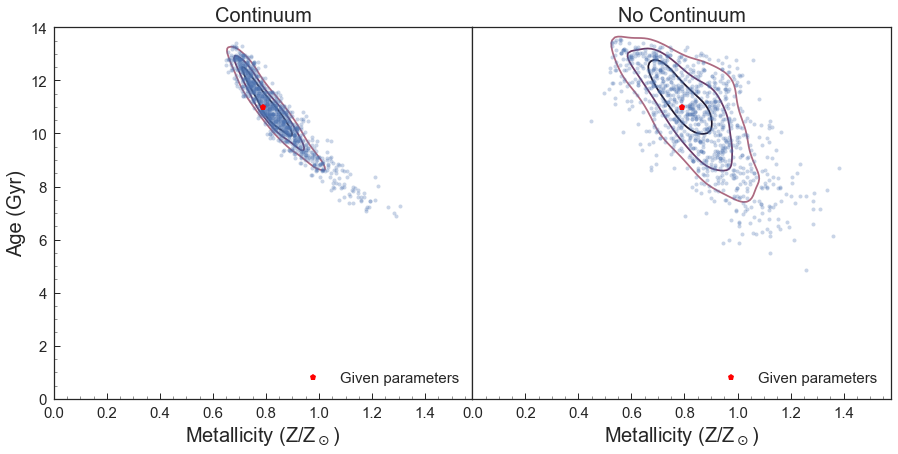

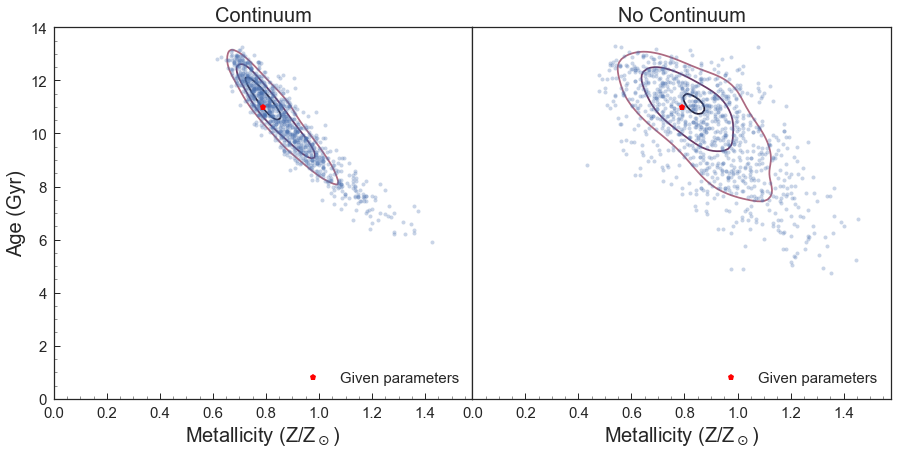

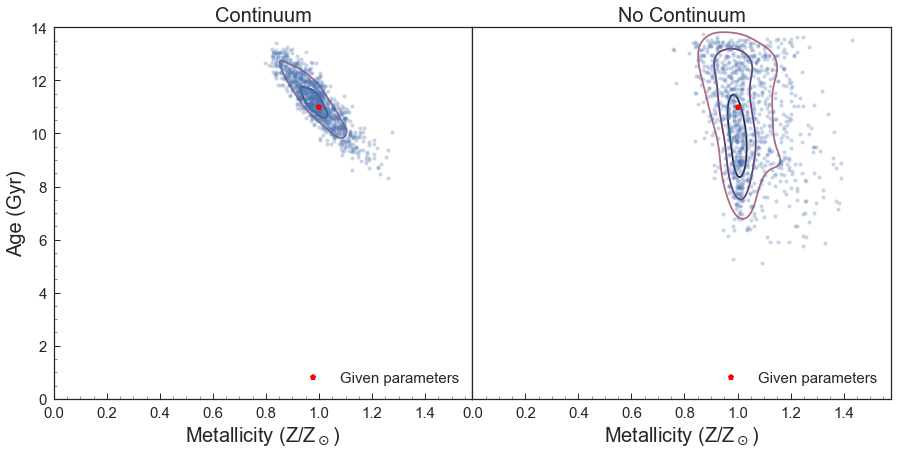

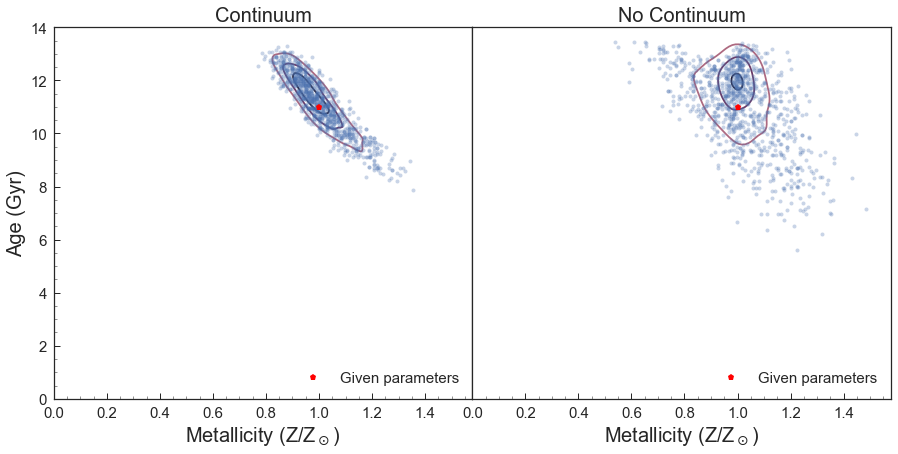

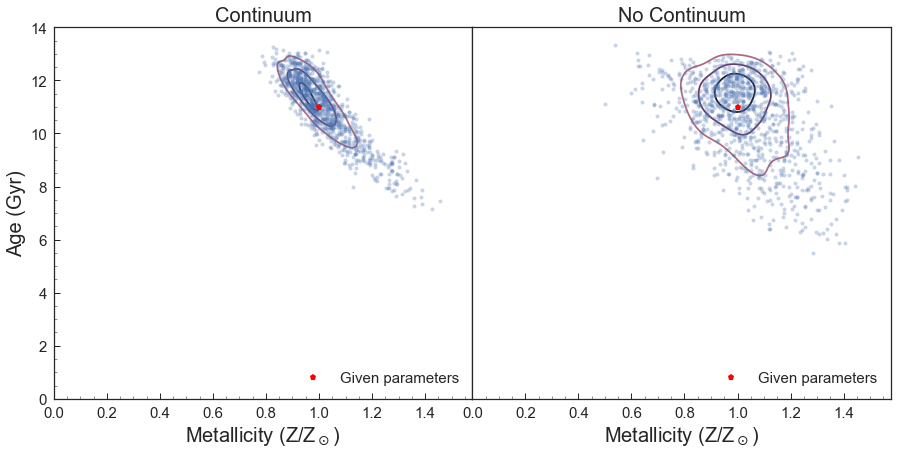

In [5]:
%matplotlib inline
colmap = sea.cubehelix_palette(12, start=3, rot=0.5, dark=0.1, light=.5, as_cmap=True)

rshift=[1.1,1.2,1.35]
mparam=[0.004,0.015,0.019]


for i in range(len(rshift)): 
    for ii in range(len(mparam)):
        mlist,alist = np.load('../mcerr/sim6528_m%s_z%s_mcerr.npy' % (mparam[i],rshift[ii]))
        ncmlist,ncalist = np.load('../mcerr/sim6528_m%s_z%s_nc_mcerr.npy' % (mparam[i],rshift[ii]))
        
        gs = gridspec.GridSpec(1,2,hspace=0,wspace=0)

        plt.figure(figsize=[15,8])
        plt.subplot(gs[0])
        plt.plot(mlist/.019,alist,'o',alpha=.3,ms=4)
        sea.kdeplot(mlist/.019,alist,n_levels=3,cmap=colmap)
        plt.plot(mparam[i]/.019,11,'rp',label='Given parameters')
        plt.axis([0.0/.019,.03/.019,0,14])
        plt.xlabel('Metallicity (Z/Z$_\odot$)',fontsize = 20)
        plt.ylabel('Age (Gyr)',fontsize = 20)
        plt.title('Continuum',fontsize = 20)
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.gcf().subplots_adjust(bottom=0.235)
        plt.legend(loc=4,fontsize=15)
        plt.minorticks_on()
        
        plt.subplot(gs[1])
        plt.plot(ncmlist/.019,ncalist,'o',alpha=.3,ms=4)
        sea.kdeplot(ncmlist/.019,ncalist,n_levels=3,cmap=colmap)
        plt.plot(mparam[i]/.019,11,'rp',label='Given parameters')
        plt.axis([0.0/.019,.03/.019,0,14])
        plt.xlabel('Metallicity (Z/Z$_\odot$)',fontsize = 20)
        # plt.ylabel('Age (Gyr)',fontsize = 20)
        plt.title('No Continuum',fontsize = 20)
        plt.yticks([])
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.gcf().subplots_adjust(bottom=0.235)
        plt.legend(loc=4,fontsize=15)
        plt.minorticks_on()
        plt.show()
        plt.close()

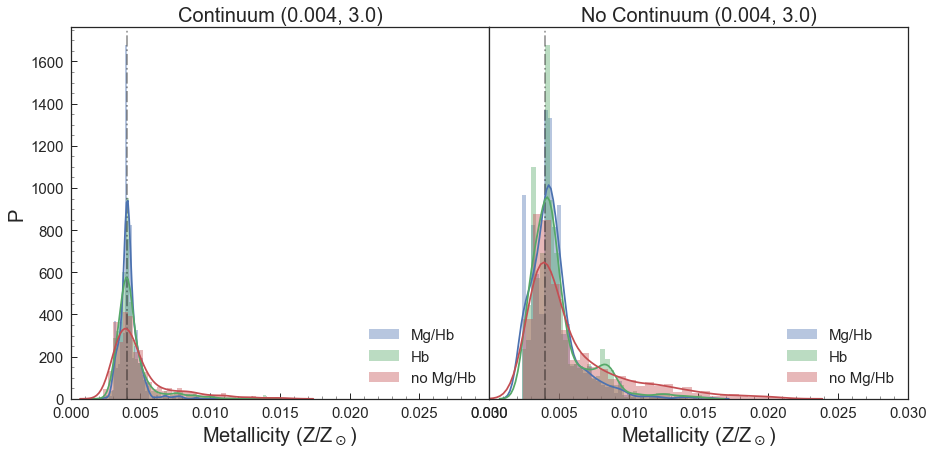

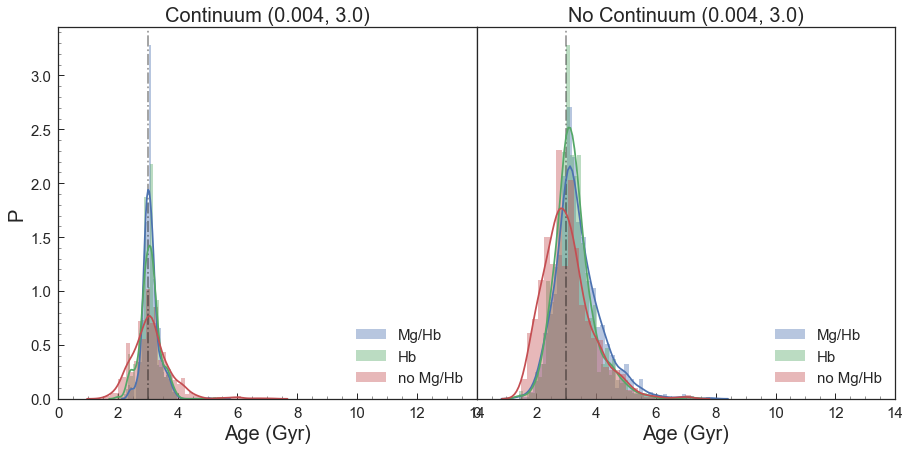

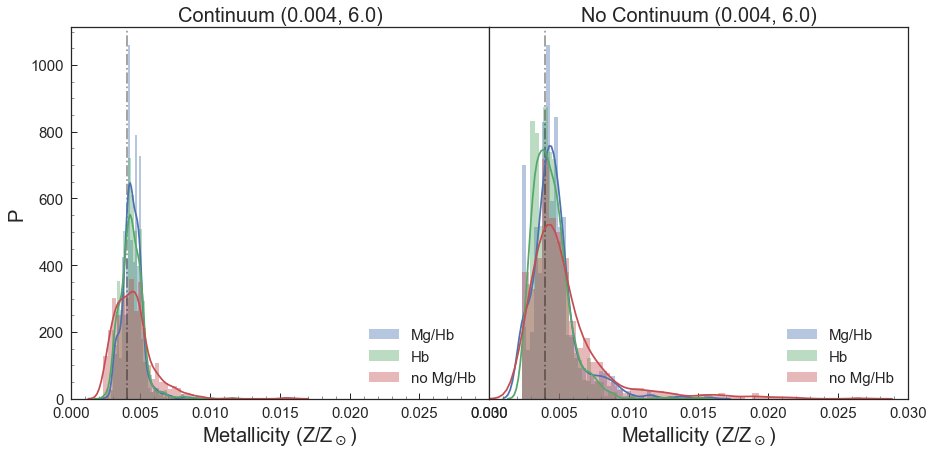

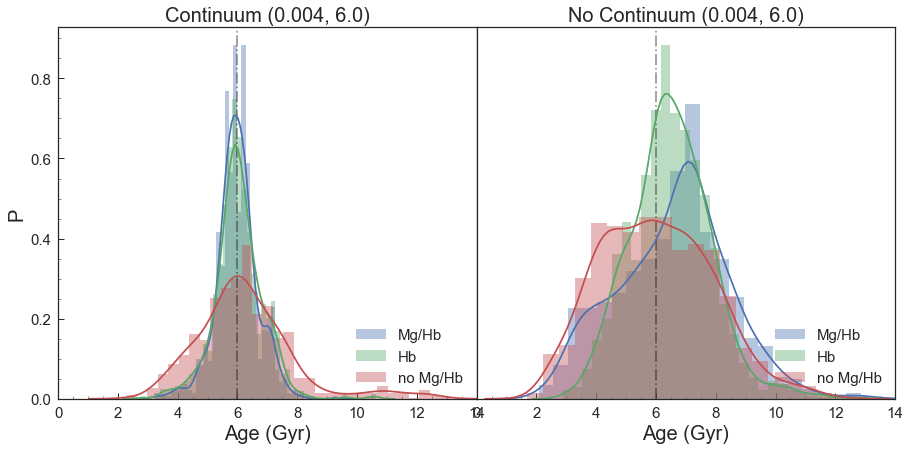

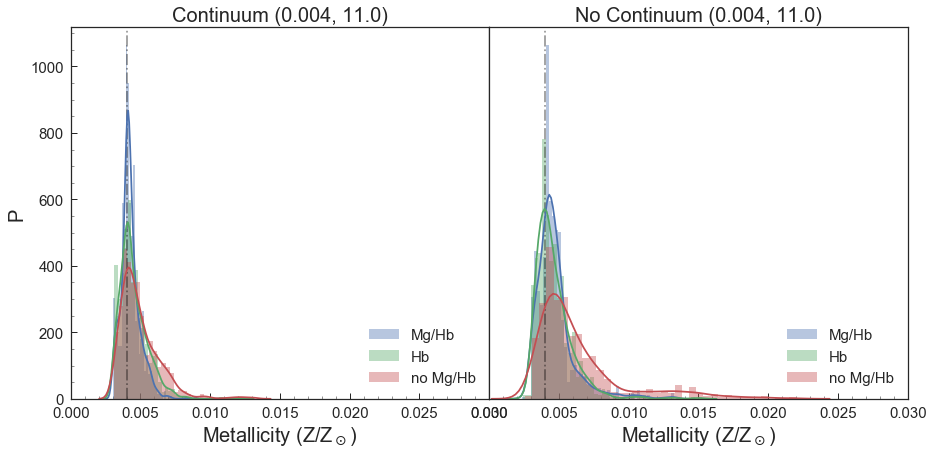

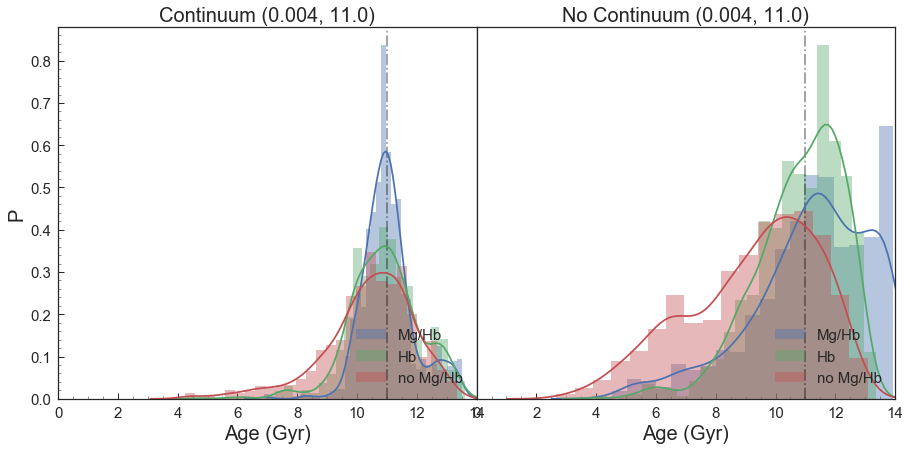

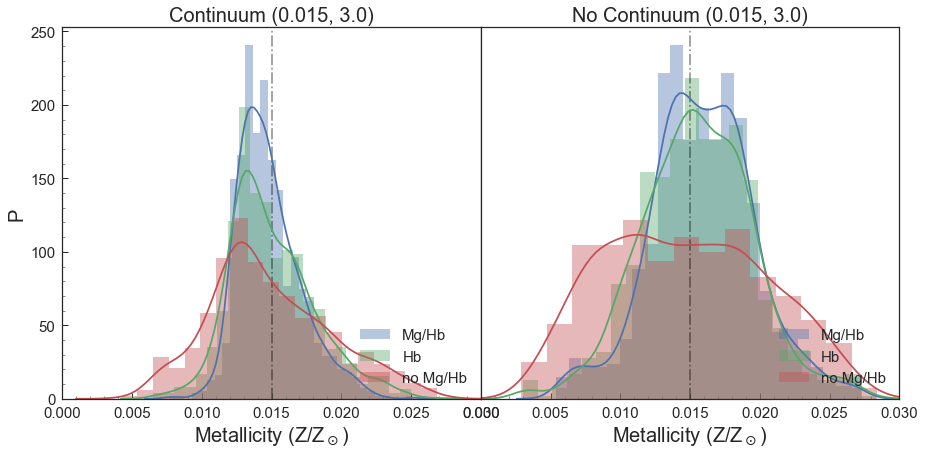

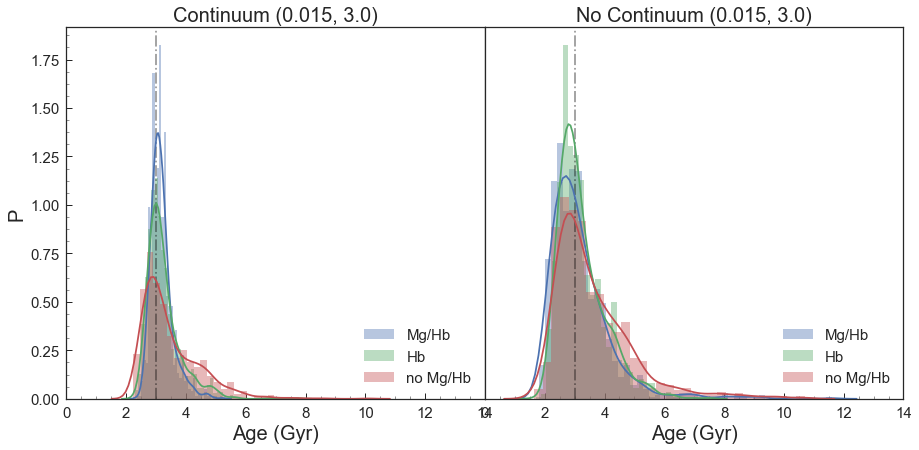

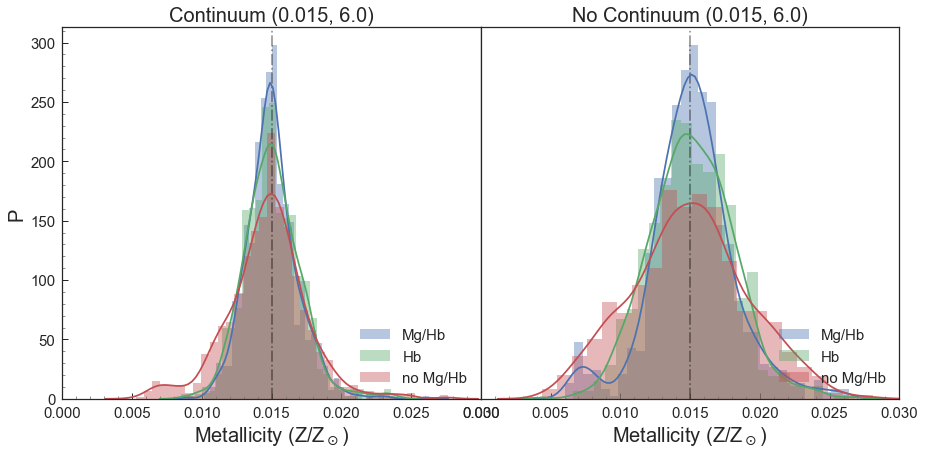

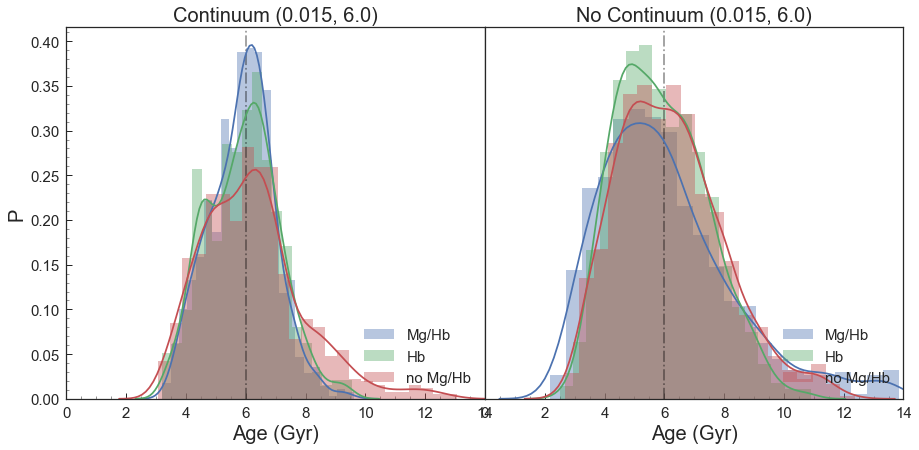

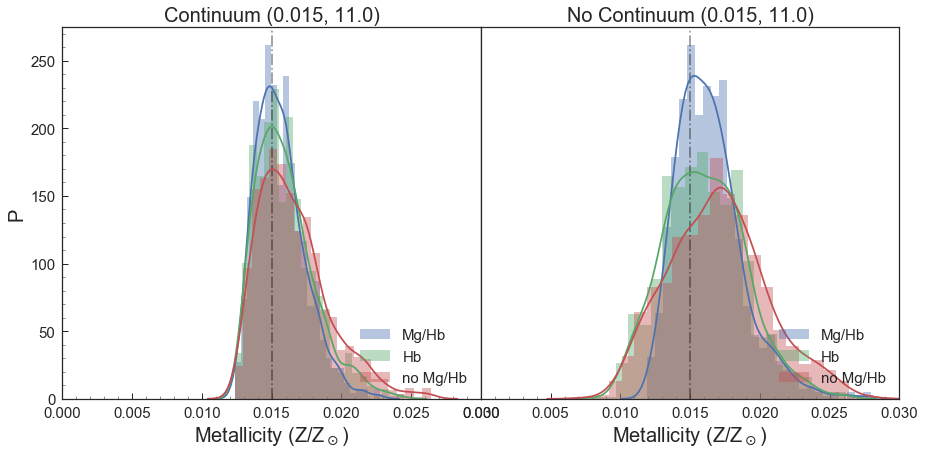

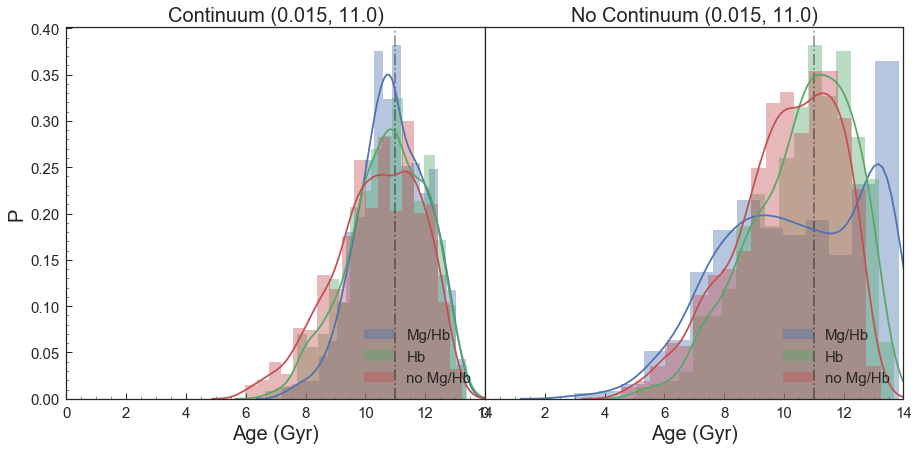

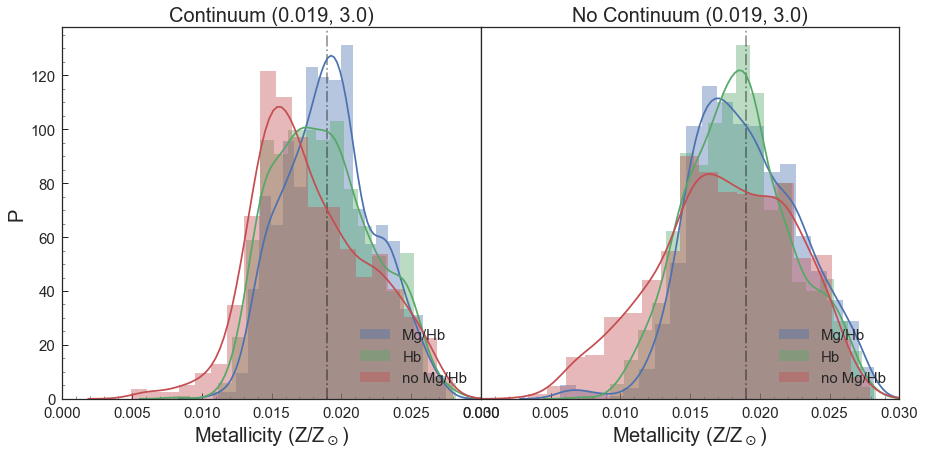

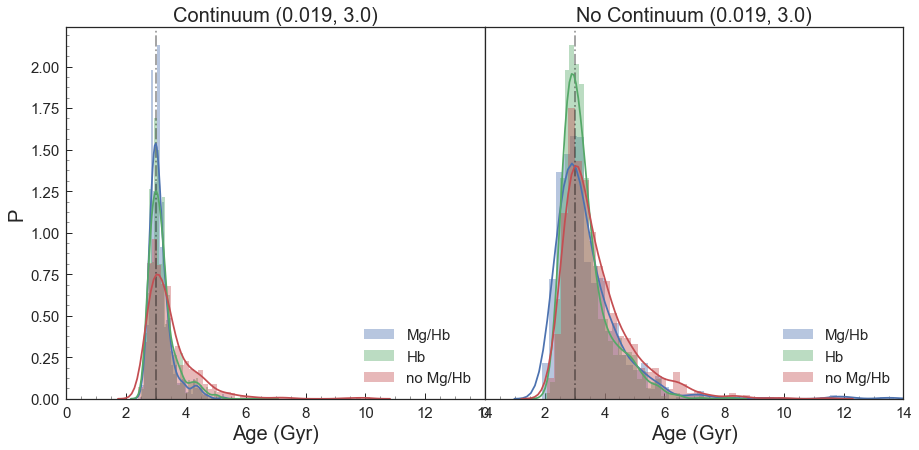

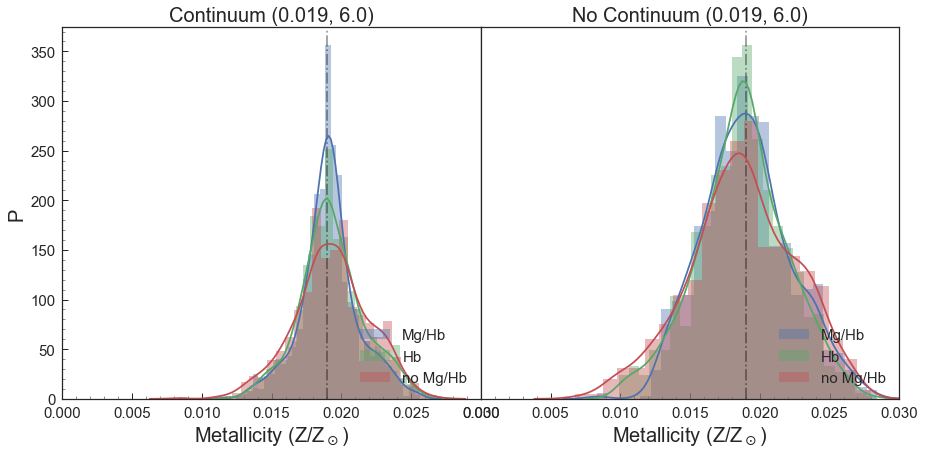

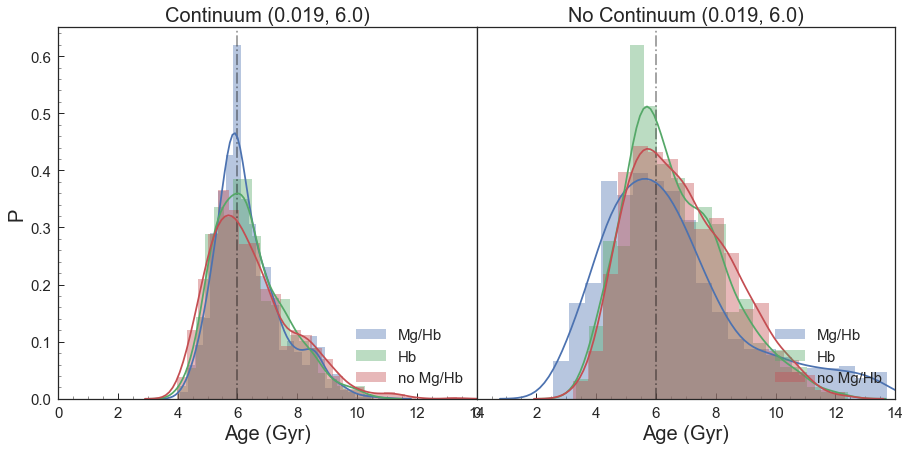

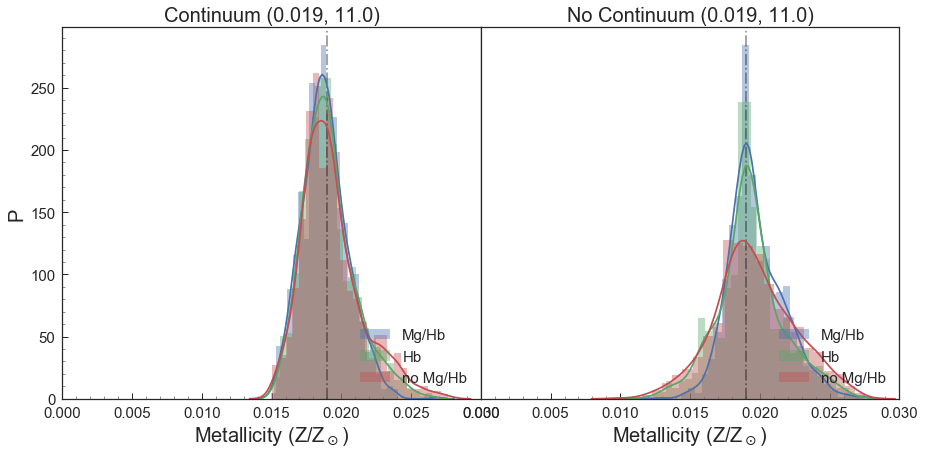

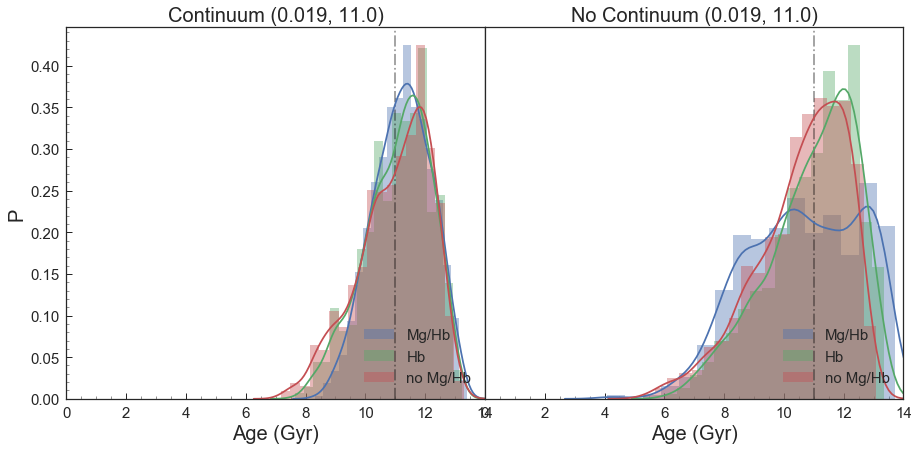

In [27]:
%matplotlib inline
colmap = sea.cubehelix_palette(12, start=3, rot=0.5, dark=0.1, light=.5, as_cmap=True)

rshift=[1.1,1.2,1.35]
mparam=[0.004,0.015,0.019]
aparam=[3.0,6.0,11.0]

for i in range(len(mparam)):
    for ii in range(len(aparam)):    
        mlist1,alist1 = np.load('../mcerr/sim6528_m%s_a%s_z1.1_mcerr.npy' % (mparam[i],aparam[ii]))
        ncmlist1,ncalist1 = np.load('../mcerr/sim6528_m%s_a%s_z1.1_nc_mcerr.npy' % (mparam[i],aparam[ii]))
        
        mlist2,alist2 = np.load('../mcerr/sim6528_m%s_a%s_z1.2_mcerr.npy' % (mparam[i],aparam[ii]))
        ncmlist2,ncalist2 = np.load('../mcerr/sim6528_m%s_a%s_z1.2_nc_mcerr.npy' % (mparam[i],aparam[ii]))
        
        mlist3,alist3 = np.load('../mcerr/sim6528_m%s_a%s_z1.35_mcerr.npy' % (mparam[i],aparam[ii]))
        ncmlist3,ncalist3 = np.load('../mcerr/sim6528_m%s_a%s_z1.35_nc_mcerr.npy' % (mparam[i],aparam[ii]))
    
        
        
        gs = gridspec.GridSpec(1,2,hspace=0,wspace=0)
        plt.figure(figsize=[15,8])
        plt.subplot(gs[0])
        plt.axvline(mparam[i],color='k',alpha=.4,linestyle='-.')
        sea.distplot(mlist1,label='Mg/Hb')
        sea.distplot(mlist2,label='Hb')
        sea.distplot(mlist3,label='no Mg/Hb')
        plt.xlim(0,.03)
        plt.xlabel('Metallicity (Z/Z$_\odot$)',fontsize = 20)
        plt.ylabel('P',fontsize = 20)
        plt.title('Continuum (%s, %s)'% (mparam[i],aparam[ii]),fontsize = 20)
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.gcf().subplots_adjust(bottom=0.235)
        plt.legend(loc=4,fontsize=15)
        plt.minorticks_on()
        
        plt.subplot(gs[1])
        plt.axvline(mparam[i],color='k',alpha=.4,linestyle='-.')
        sea.distplot(ncmlist1,label='Mg/Hb')
        sea.distplot(ncmlist2,label='Hb')
        sea.distplot(ncmlist3,label='no Mg/Hb')
        plt.xlim(0,.03)
        plt.xlabel('Metallicity (Z/Z$_\odot$)',fontsize = 20)
        plt.title('No Continuum (%s, %s)'% (mparam[i],aparam[ii]),fontsize = 20)
        plt.yticks([])
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.gcf().subplots_adjust(bottom=0.235)
        plt.legend(loc=4,fontsize=15)
        plt.minorticks_on()
        plt.show()
        plt.close()
        
        gs = gridspec.GridSpec(1,2,hspace=0,wspace=0)
        plt.figure(figsize=[15,8])
        plt.subplot(gs[0])
        plt.axvline(aparam[ii],color='k',alpha=.4,linestyle='-.')
        sea.distplot(alist1,label='Mg/Hb')
        sea.distplot(alist2,label='Hb')
        sea.distplot(alist3,label='no Mg/Hb')
        plt.xlim(0,14)
        plt.xlabel('Age (Gyr)',fontsize = 20)
        plt.ylabel('P',fontsize = 20)
        plt.title('Continuum (%s, %s)'% (mparam[i],aparam[ii]),fontsize = 20)
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.gcf().subplots_adjust(bottom=0.235)
        plt.legend(loc=4,fontsize=15)
        plt.minorticks_on()
        
        plt.subplot(gs[1])
        plt.axvline(aparam[ii],color='k',alpha=.4,linestyle='-.')
        sea.distplot(ncalist1,label='Mg/Hb')
        sea.distplot(ncalist2,label='Hb')
        sea.distplot(ncalist3,label='no Mg/Hb')
        plt.xlim(0,14)
        plt.xlabel('Age (Gyr)',fontsize = 20)
        plt.title('No Continuum (%s, %s)'% (mparam[i],aparam[ii]),fontsize = 20)
        plt.yticks([])
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.gcf().subplots_adjust(bottom=0.235)
        plt.legend(loc=4,fontsize=15)
        plt.minorticks_on()
        plt.show()
        plt.close()